In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('train.csv')

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
train['psqft_gla'] = train['SalePrice'] / train['GrLivArea']
train['psqft_lot'] = train['SalePrice']/train['LotArea']

PSqFt vs. Sub Class Boxplot

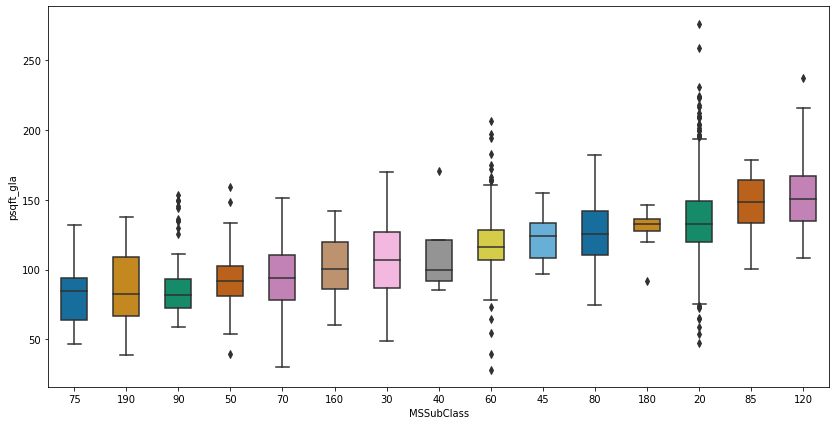

In [29]:
a = train[["MSSubClass","psqft_gla"]].groupby("MSSubClass").mean().sort_values(by="psqft_gla") 
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.boxplot(y="psqft_gla", x="MSSubClass", data=train, width=0.5, palette="colorblind", order=a.index)

PSqFt vs. Neighbourhood Boxplot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

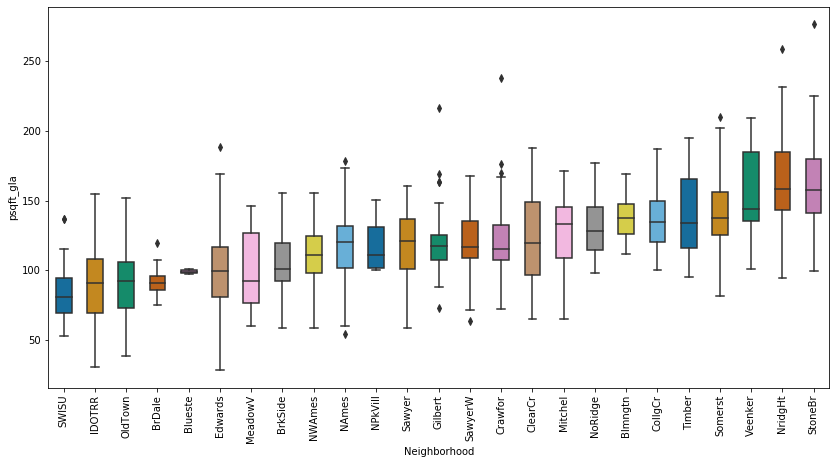

In [33]:
a = train[["Neighborhood","psqft_gla"]].groupby("Neighborhood").mean().sort_values(by="psqft_gla") 
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.boxplot(y="psqft_gla", x="Neighborhood", data=train, width=0.5, palette="colorblind", order=a.index)
plt.xticks(rotation = 90)

PSqFt vs. Overall Quality 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

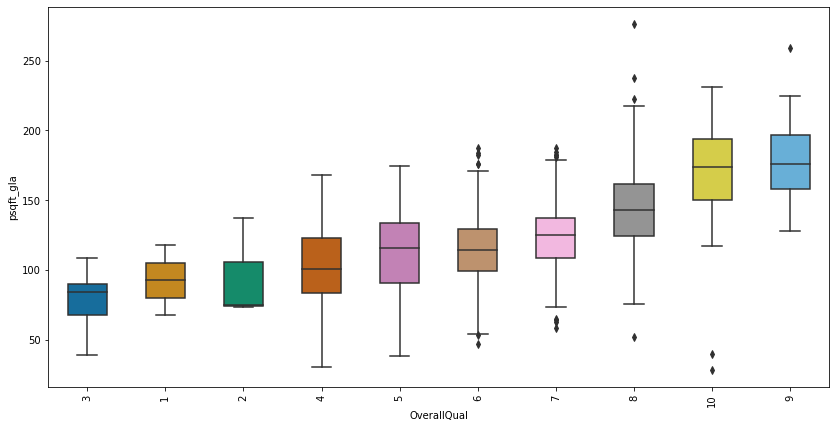

In [35]:
a = train[["OverallQual","psqft_gla"]].groupby("OverallQual").mean().sort_values(by="psqft_gla") 
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.boxplot(y="psqft_gla", x="OverallQual", data=train, width=0.5, palette="colorblind", order=a.index)
plt.xticks(rotation = 90)

PSqFt - Lot Area vs. Sub Class 

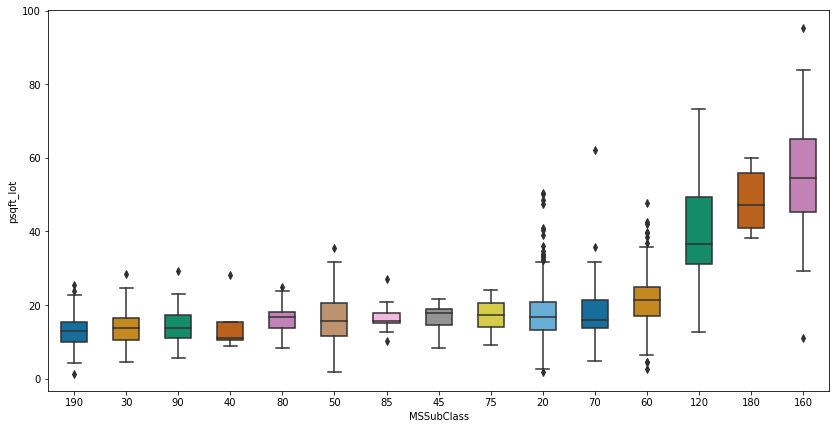

In [30]:
a = train[["MSSubClass","psqft_lot"]].groupby("MSSubClass").mean().sort_values(by="psqft_lot") 
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.boxplot(y="psqft_lot", x="MSSubClass", data=train, width=0.5, palette="colorblind", order=a.index)

PSqFt - Lot Area vs. Neighbourhood

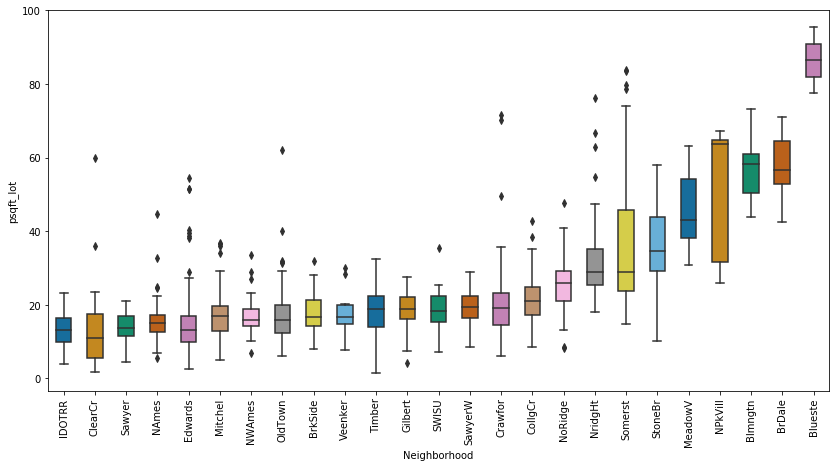

In [237]:
a = train[["Neighborhood","psqft_lot"]].groupby("Neighborhood").mean().sort_values(by="psqft_lot") 
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
plt.xticks(rotation = 90)
graph = sns.boxplot(y="psqft_lot", x="Neighborhood", data=train, width=0.5, palette="colorblind", order=a.index)


In [238]:
#splitting in quality into classes for easier viz

train['date'] = list(map(lambda x,y: str(y)+"-"+str(x),map(lambda x: "0"+str(x) if int(x)<10 else str(x), train['MoSold']),train['YrSold']))
a = train[["date","MoSold", "YrSold","psqft_gla", "OverallQual"]]
a = pd.DataFrame(a)
a["OQ2"] = ""
a["OQ2"] = np.where(a['OverallQual'].between(9,10), 'A', a['OQ2'])
a["OQ2"] = np.where(a['OverallQual'].between(7,8), 'B', a['OQ2']) 
a["OQ2"] = np.where(a['OverallQual'].between(5,6), 'C', a['OQ2']) 
a["OQ2"] = np.where(a['OverallQual'].between(3,4), 'D', a['OQ2']) 
a["OQ2"] = np.where(a['OverallQual'].between(1,2), 'E', a['OQ2']) 

train_count = a.groupby(["MoSold", "YrSold", "date", "OQ2"]).count().reset_index()
train_mean = a.groupby(["date", "OQ2"]).mean().reset_index()


Number of houses sold over time

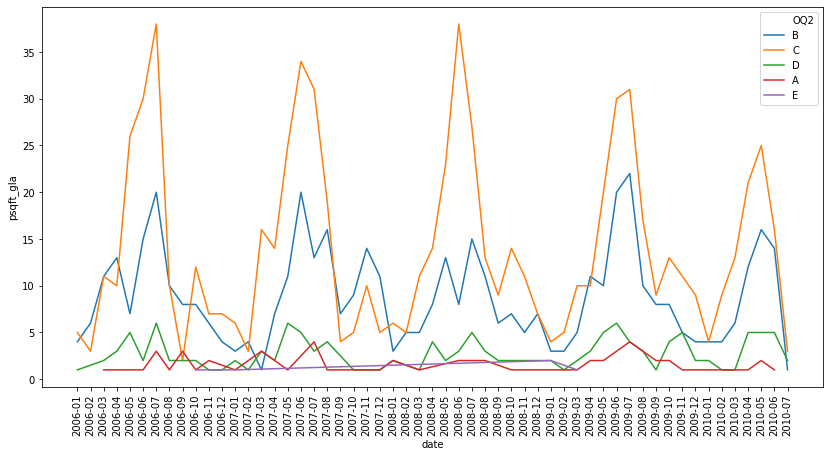

In [239]:
plt.figure(figsize=(14,7))
plt.xticks(rotation = 90)
graph = sns.lineplot(y="psqft_gla", x="date", hue = "OQ2", data=train_count, estimator=None)


Price changes over time 

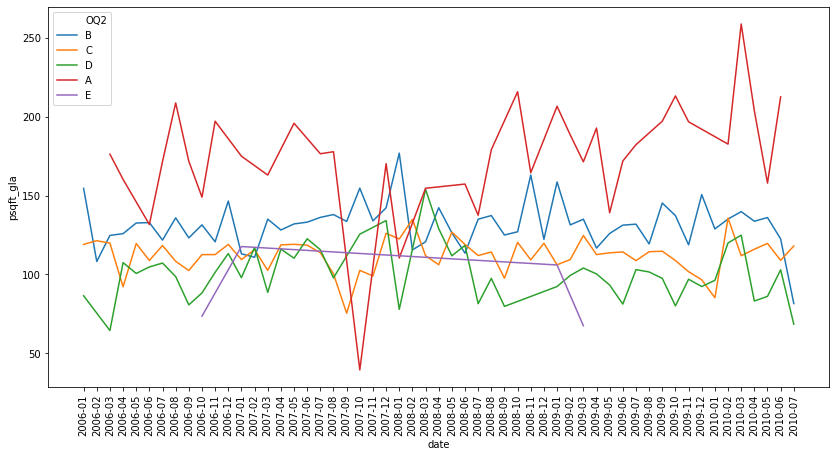

In [257]:
plt.figure(figsize=(14,7))
plt.xticks(rotation = 90)
graph = sns.lineplot(y="psqft_gla", x="date", hue = "OQ2", data=train_mean, estimator=None)

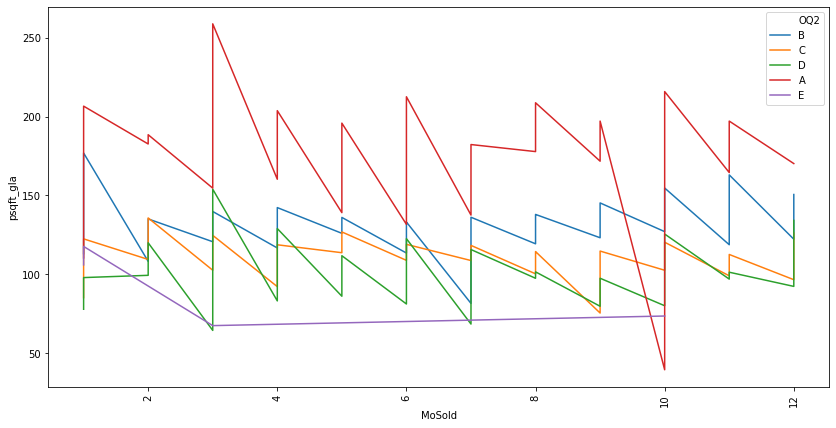

In [262]:
plt.figure(figsize=(14,7))
plt.xticks(rotation = 90)
graph = sns.lineplot(y="psqft_gla", x="MoSold", hue = "OQ2", data=train_mean, estimator=None)


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

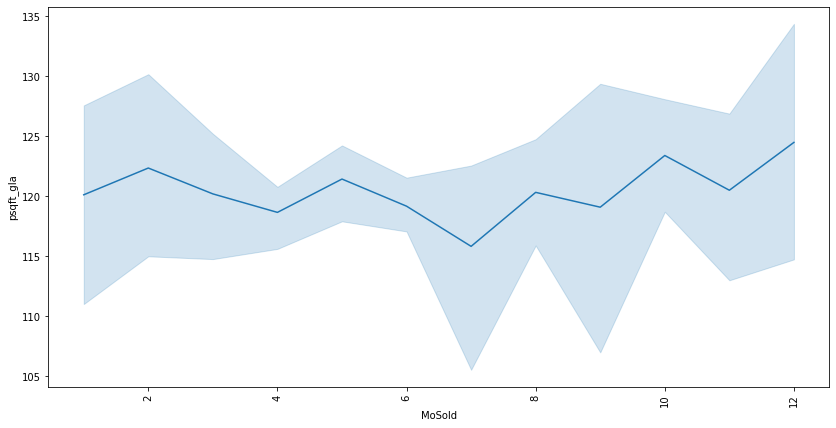

In [190]:
a = train[["MoSold","YrSold", "psqft_gla"]].groupby(["MoSold", "YrSold"]).mean().reset_index()
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.lineplot(y="psqft_gla", x="MoSold", data=train_mean, palette = palette)
#graph = sns.lineplot(y="psqft_gla", x="MoSold", data=train)
plt.xticks(rotation = 90)


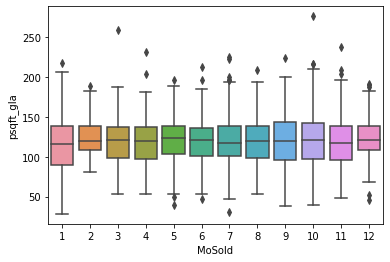

In [193]:
sns.boxplot(x = "MoSo  ld",y = "psqft_gla", data = train)

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 <a list of 8 Text xticklabel objects>)

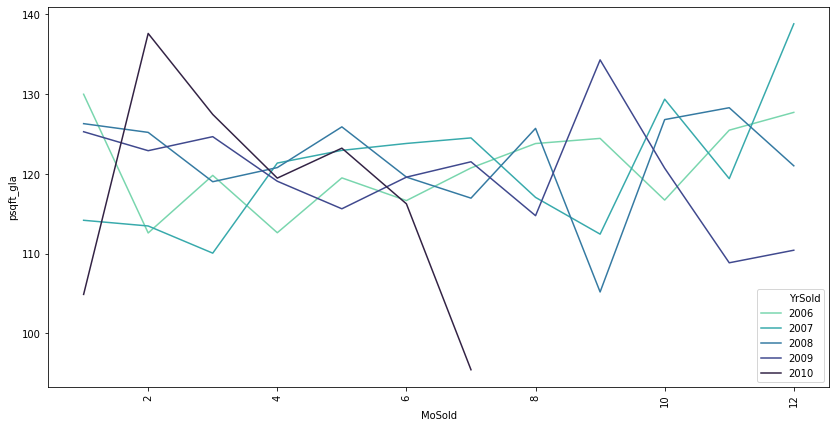

In [189]:
a = train[["MoSold","YrSold", "psqft_gla"]].groupby(["MoSold", "YrSold"]).mean().reset_index()
a = pd.DataFrame(a)
plt.figure(figsize=(14,7))
graph = sns.lineplot(y="psqft_gla", x="MoSold", hue = "YrSold", data=a, palette = palette)
#graph = sns.lineplot(y="psqft_gla", x="MoSold", data=train)
plt.xticks(rotation = 90)
